In [64]:
# Матрица смежности
matrix = [
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
]

In [65]:
# Обход графа в ширину
from collections import deque
def bfs(matrix, start_node):
    visited = [False] * len(matrix)
    queue = deque()
    queue.append(start_node)
    visited[start_node] = True
    result = []

    while queue:
        node = queue.popleft()
        result.append(node + 1)  

        for i, value in enumerate(matrix[node]):
            if value == 1 and not visited[i]:
                queue.append(i)
                visited[i] = True

    return result
bfs(matrix, 0)

[1, 6, 9, 3, 8, 16, 2, 4, 5, 13, 19, 18, 12, 10, 17, 14, 7, 11, 15, 20]

In [66]:
# Обход графа в глубину
def dfs(matrix, node, visited):
    visited[node] = True
    result = [node + 1]  # Добавляем 1 к индексу в результат
    for i, value in enumerate(matrix[node]):
        if value == 1 and not visited[i]:
            result += dfs(matrix, i, visited)
    return result
visited = [False] * len(matrix)
dfs(matrix, 0, visited)

[1, 6, 3, 2, 4, 5, 9, 8, 13, 18, 10, 14, 17, 7, 11, 15, 20, 19, 12, 16]

In [67]:
# Создание своей функции для поиска DFS (глубины)
def bfs(matrix):
    vh= [0, 0]  #наибольшие вершины
    vw = [[], []]  #разные пути к вершинам

    for start_node in range(len(matrix)):
        visited = [False] * len(matrix)
        queue = deque()
        queue.append(start_node)
        visited[start_node] = True
        result = []
        while queue:
            node = queue.popleft()
            result.append(node)
            for i, value in enumerate(matrix[node]):
                if value == 1 and not visited[i]:
                    queue.append(i)
                    visited[i] = True

        if len(result) > len(vw[0]):
            vw[1] = vw[0]
            vw[0] = result
            vh[1] = vh[0]
            vh[0] = start_node
        elif len(result) > len(vw[1]):
            vw[1] = result
            vh[1] = start_node

    return vh, vw

In [68]:
# Нахождение разницы во времени
import time
start_time = time.time()
vh, vw = bfs(matrix)
end_time = time.time()
bfs_time = end_time - start_time
print("Наибольшие вершины и их пути (BFS): ")
print(vh, vw)
print(f"Время выполнения BFS: {bfs_time} секунд")

Наибольшие вершины и их пути (BFS): 
[0, 1] [[0, 5, 8, 2, 7, 15, 1, 3, 4, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19], [1, 2, 3, 4, 5, 0, 8, 7, 15, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19]]
Время выполнения BFS: 0.0 секунд


In [69]:
# Создание своей функции для поиска BFS (ширины)
def dfs(matrix):
    def dfs(node, visited, path):
        visited[node] = True
        path.append(node)

        for i, value in enumerate(matrix[node]):
            if value == 1 and not visited[i]:
                dfs(i, visited, path)

    vh = [0, 0]  
    vw = [[], []]  

    for start_node in range(len(matrix)):
        visited = [False] * len(matrix)
        path = []
        dfs(start_node, visited, path)

        if len(path) > len(vw[0]):
            vw[1] = vw[0]
            vw[0] = path
            vh[1] = vh[0]
            vh[0] = start_node
        elif len(path) > len(vw[1]):
            vw[1] = path
            vh[1] = start_node

    return vh, vw

In [70]:
start_time = time.time()
vh, vw = dfs(matrix)
end_time = time.time()
dfs_time = end_time - start_time

print("Наибольшие вершины и их пути (DFS):")
print(vh, vw)
print(f"Время выполнения DFS: {dfs_time} секунд")

Наибольшие вершины и их пути (DFS):
[0, 1] [[0, 5, 2, 1, 3, 4, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15], [1, 2, 3, 4, 5, 0, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15]]
Время выполнения DFS: 0.0 секунд


Поскольку скорость выполнения двух алгоритмов высока для малых вычичслений, как в нашем примере, то время выполнения в обоих случаях стремится к нулю

У меня не получилось найти другие библитотеки, которые находят ширину и глубину смеженых графов

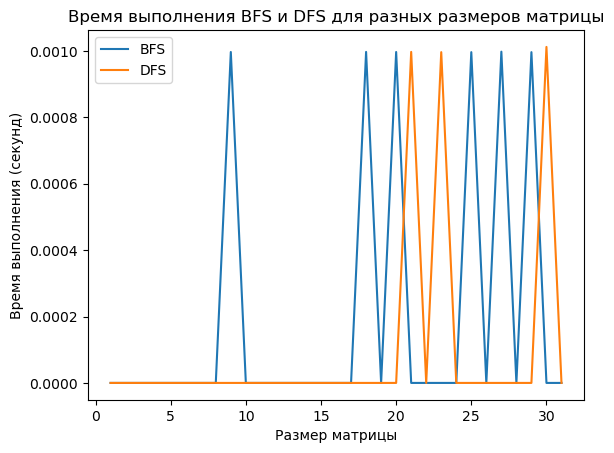

In [90]:
# Построение графиков для
import time
import matplotlib.pyplot as plt

def bfs_currently_time(matrix):
    start_time = time.time()
    bfs(matrix)
    end_time = time.time()
    return end_time - start_time

def dfs_currently_time(matrix):
    start_time = time.time()
    dfs(matrix)
    end_time = time.time()
    return end_time - start_time

bfs_times = []
dfs_times = []
matrix_sizes = []

for i in range(1, 32):
    size = i
    matrix_sizes.append(size)
    sub_matrix = [row[:size] for row in matrix[:size]]  
    bfs_time = bfs_currently_time(sub_matrix)
    dfs_time = dfs_currently_time(sub_matrix)
    bfs_times.append(bfs_time)
    dfs_times.append(dfs_time)

plt.plot(matrix_sizes, bfs_times, label='BFS')
plt.plot(matrix_sizes, dfs_times, label='DFS')
plt.xlabel('Размер матрицы')
plt.ylabel('Время выполнения (секунд)')
plt.legend()
plt.title('Время выполнения BFS и DFS для разных размеров матрицы')
plt.show()